In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#############################################

from sklearn.ensemble import RandomForestClassifier

In [3]:
ds = pd.read_csv('glass.csv'); ds

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
ds_1 = ds.groupby(by='Type')[['RI']].count().sort_values(by='RI', ascending=False)

ds_1.columns = ['Записей']

ds_1['Доля'] = ds_1['Записей'] / ds_1['Записей'].sum()

ds_1

,Записей,Доля
Type,,
2,76,0.355140
1,70,0.327103
7,29,0.135514
3,17,0.079439
5,13,0.060748
6,9,0.042056


In [5]:
ds.iloc[:,-1:]

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


Неравномерное разделение - на 2 класса приходится 67% записей, на 1 класс - 14%, и 4-7% на остальные

In [6]:
x_train, x_test, y_train, y_test = train_test_split(ds.iloc[:,:-1], 
                                                    ds.iloc[:,-1:], 
                                                    test_size=0.2, 
                                                    random_state=56)

In [7]:
model = RandomForestClassifier(max_depth=4, random_state=65)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([2, 1, 2, 6, 2, 1, 5, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 7, 7, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 7, 1, 1, 1, 2, 1, 1, 1, 1, 2, 6, 1, 1],
      dtype=int64)

In [8]:
len(y_pred)

43

In [9]:
pt = 0

for pred, test in list(zip(y_pred, np.array(y_test.Type))):
    if pred == test:
        pt += 1

print(f'Доля угаданных значений: {pt / len(y_pred):.2%}')

Доля угаданных значений: 67.44%


In [10]:
ds_1 = ds.sort_values(by='RI')

ds_1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2


RI


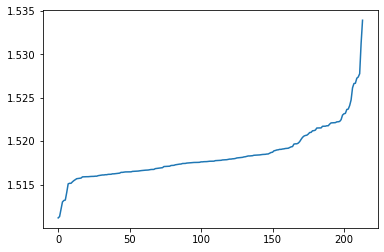

Na


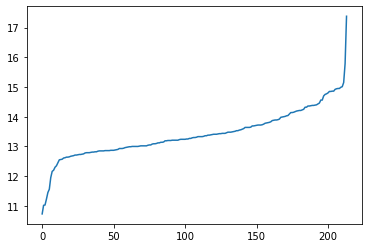

Mg


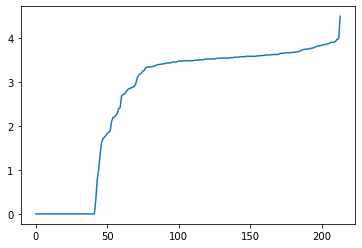

Al


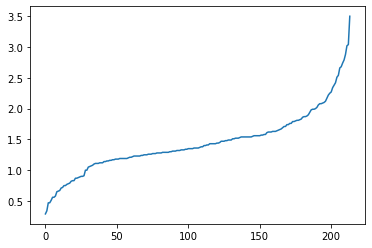

Si


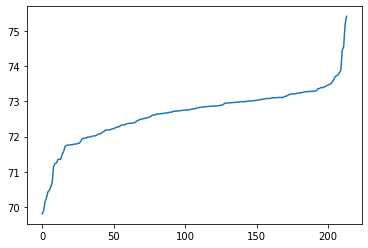

K


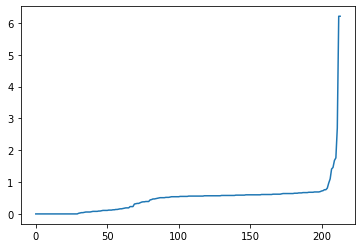

Ca


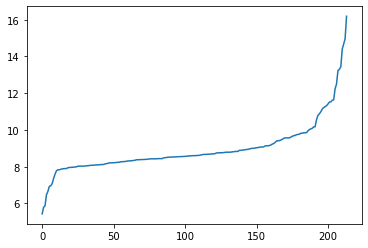

Ba


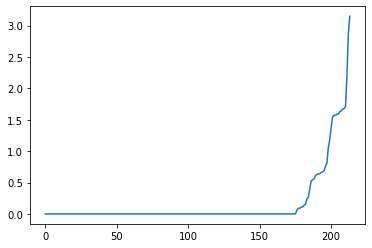

Fe


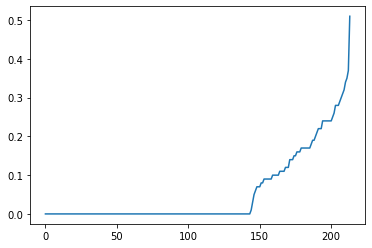

Type


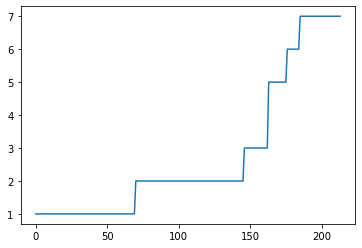

In [11]:
for col in ds.columns:
    print(col)
    ds_1 = ds.sort_values(by=col)
    ds_1.reset_index(drop=True, inplace=True)
    ds_1[col].plot()
    plt.show()

RI


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


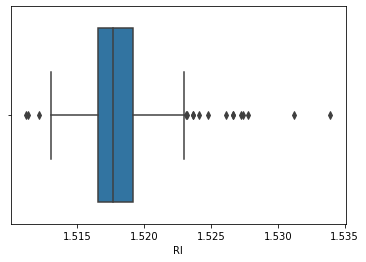

Na


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


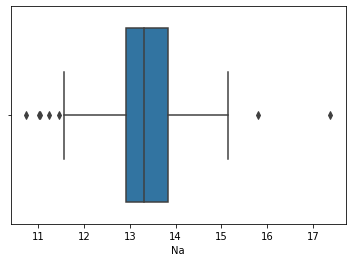

Mg


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


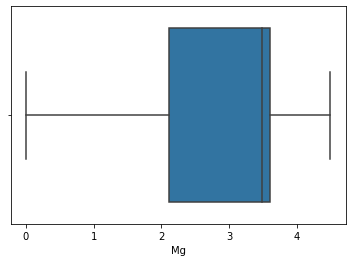

Al


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


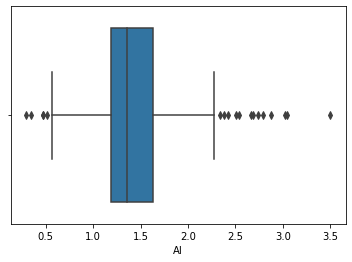

Si


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


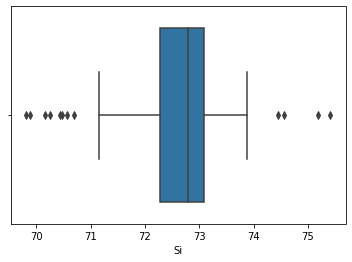

K


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


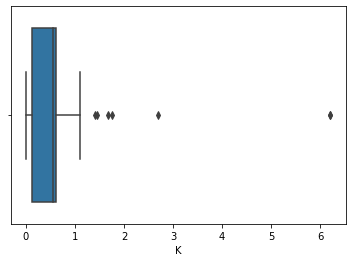

Ca


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


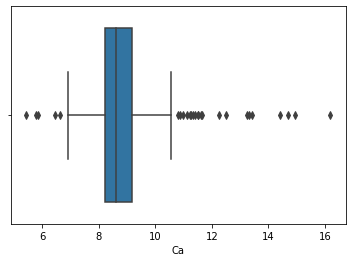

Ba


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


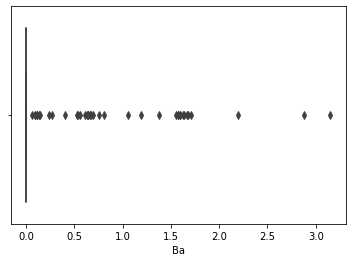

Fe


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


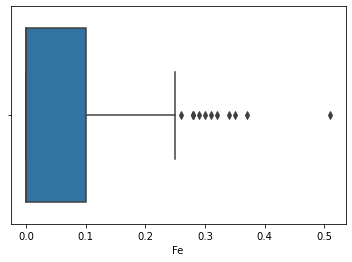

Type


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


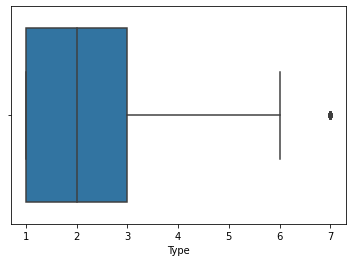

In [13]:
for col in ds.columns:
    print(col)
    sns.boxplot(ds_1[col]);
    plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


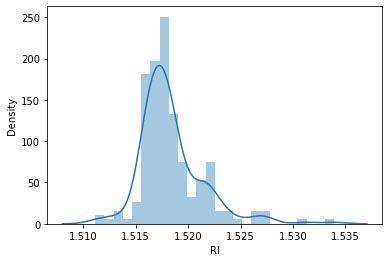

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


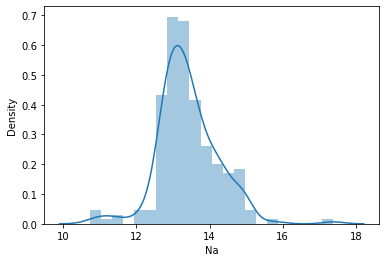

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


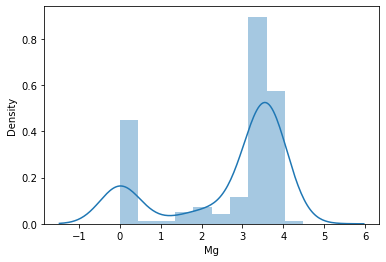

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


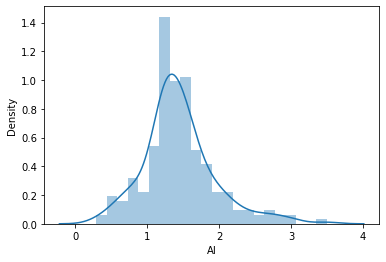

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


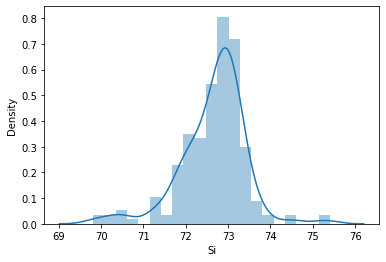

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


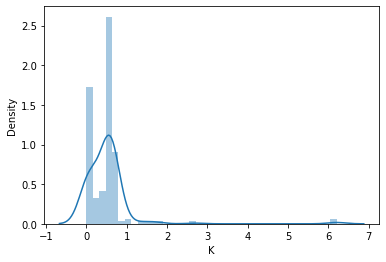

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


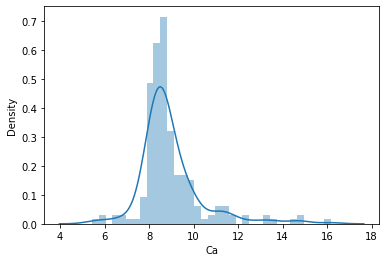

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


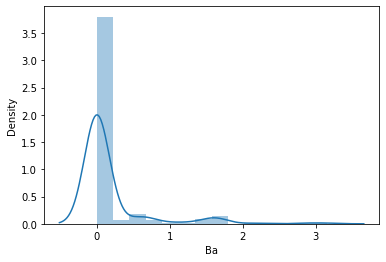

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


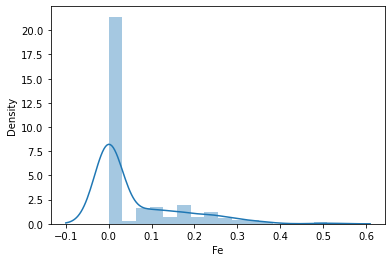

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


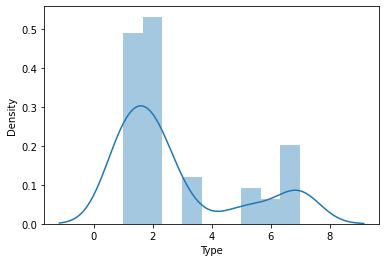

In [82]:
for col in ds.columns:
    sns.distplot(ds_1[col]);
    plt.show()

Выбросы: RI, NA, AI, Si, K, Ca

In [18]:
ds_2 = ds_1.query(
    'RI < 1530 and Na > 12 and Na < 15.8 and Al < 3.1 and Si > 71 and Si < 74.1 and K < 2 and Ca > 6 and Ca < 16'
).copy()

ds_2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
2,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00,1
3,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00,1
4,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,1
...,...,...,...,...,...,...,...,...,...,...
205,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
206,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
209,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
212,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7


In [22]:
f'Удалено {ds_2.shape[0] / ds_1.shape[0] - 1:.2%} записей-выбросов'

'Удалено -8.88% записей-выбросов'

In [23]:
x_train, x_test, y_train, y_test = train_test_split(ds_2.iloc[:,:-1], 
                                                    ds_2.iloc[:,-1:], 
                                                    test_size=0.2, 
                                                    random_state=56)



model = RandomForestClassifier(max_depth=4, random_state=65)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

pt = 0

for pred, test in list(zip(y_pred, np.array(y_test.Type))):
    if pred == test:
        pt += 1

print(f'Доля угаданных значений: {pt / len(y_pred):.2%}')

Доля угаданных значений: 74.36%


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Были удалены выбросы, и точность модели вырасла на 7-8% - с 67% до 74%.

Удалось поднять точность модели.

Имеет смысл удалять выбросы, если повышение точности превышает потерю данных (т.к. исключённые 8% записей потенциально будут ошибочными при предсказании.